<img src=https://audiovisuales.icesi.edu.co/assets/custom/images/ICESI_logo_prin_descriptor_RGB_POSITIVO_0924.jpg width=200>

*Milton Orlando Sarria Paja, PhD.*

----

###  Regresión Logística con Python y Scikit-Learn

#### Contenidos
1. Regresión Logística
   - Introducción
   - Implementación en Python
   - Interpretación de Resultados
   - Métricas de Desempeño



In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification



#  2. Regresión Logística

#### Introducción
La regresión logística es una técnica utilizada para modelar la probabilidad de un evento binario. A diferencia de la regresión lineal, la salida es una variable categórica.

#### Implementación en Python

**Paso 1: Importar las bibliotecas necesarias**



### Paso 1: Crear el Conjunto de Datos Artificial

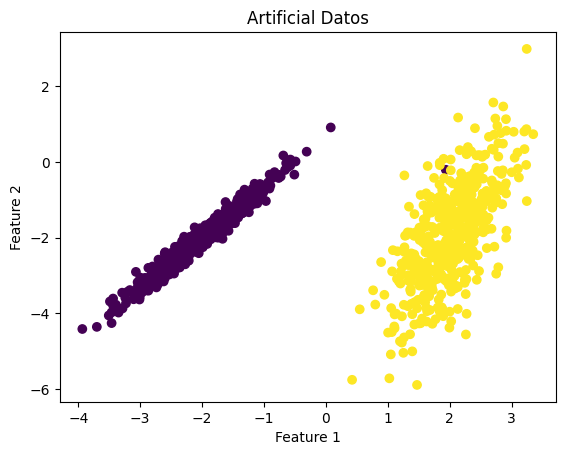

In [70]:
# Crear un conjunto de datos artificial
X, y = make_classification(n_samples=1000, 
                           n_features=2, 
                           n_informative=2, 
                           n_redundant=0, 
                           n_clusters_per_class=1, 
                           class_sep=2, random_state=4)

# Visualizar los datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Artificial Datos')
plt.show()


### Paso 2: Separar los Datos en Entrenamiento y Prueba

In [71]:
# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Paso 3: Entrenar el Modelo de Regresión Logística

In [72]:
# Entrenar el modelo
model = LogisticRegression(max_iter=20)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,20
,multi_class,'deprecated'


In [73]:
model.coef_


array([[ 3.13974382, -1.14905526]])

In [74]:
model.intercept_

array([-2.44337045])

### Paso 4: Hacer Predicciones y Calcular Métricas de Desempeño

In [75]:
probabilidades = model.predict_proba(X_test)
probabilidades[:10]

array([[9.98229490e-01, 1.77050976e-03],
       [9.96716216e-01, 3.28378369e-03],
       [4.32912431e-04, 9.99567088e-01],
       [1.05525481e-02, 9.89447452e-01],
       [7.49007791e-03, 9.92509922e-01],
       [9.97883042e-01, 2.11695804e-03],
       [6.23121006e-04, 9.99376879e-01],
       [9.98168243e-01, 1.83175675e-03],
       [9.81845177e-01, 1.81548230e-02],
       [9.99034095e-01, 9.65904946e-04]])

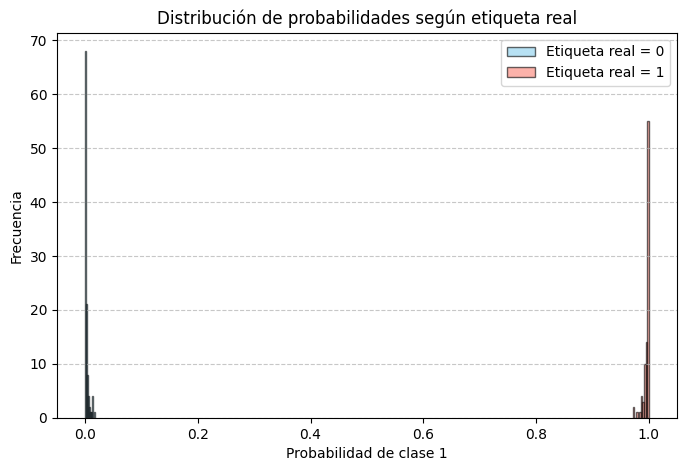

In [76]:
# Filtrar probabilidades según la clase real
prob_clase0 = probabilidades[y_test == 0,1]
prob_clase1 = probabilidades[y_test == 1,1]

# Graficar histogramas en la misma figura
plt.figure(figsize=(8,5))
plt.hist(prob_clase0, bins=10, alpha=0.6, label="Etiqueta real = 0", color="skyblue", edgecolor="black")
plt.hist(prob_clase1, bins=10, alpha=0.6, label="Etiqueta real = 1", color="salmon", edgecolor="black")

plt.xlabel("Probabilidad de clase 1")
plt.ylabel("Frecuencia")
plt.title("Distribución de probabilidades según etiqueta real")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [77]:
score = probabilidades[:,1]
score>0.5

array([False, False,  True,  True,  True, False,  True, False, False,
       False,  True, False, False,  True, False, False, False,  True,
       False, False,  True,  True,  True,  True, False,  True,  True,
       False, False,  True,  True, False, False,  True, False,  True,
        True, False, False,  True, False, False,  True,  True,  True,
       False,  True, False, False, False,  True,  True, False,  True,
       False,  True,  True, False, False, False,  True,  True, False,
       False, False, False,  True,  True,  True,  True, False,  True,
       False, False,  True, False, False, False, False,  True, False,
        True,  True, False, False,  True,  True, False, False,  True,
       False, False, False,  True,  True,  True, False, False,  True,
        True, False, False, False, False, False, False,  True, False,
        True, False, False, False, False,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True, False, False,  True,
       False, False,

In [78]:
# Hacer predicciones
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0])

In [79]:
sum(y_test==y_pred)/y_test.size

np.float64(1.0)

In [80]:
# Calcular métricas de desempeño
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.0
Confusion Matrix:
[[110   0]
 [  0  90]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        90

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



#### Interpretación de Métricas

- **Exactitud**: Proporción de predicciones correctas sobre el total de predicciones.
- **Matriz de Confusión**: Tabla que muestra las verdaderas etiquetas vs. las predicciones del modelo.
- **Reporte de Clasificación**: Incluye métricas como precisión, recall y F1-score.
- **Precisión**: Proporción de verdaderos positivos entre todos los positivos predichos.
- **Recall (Sensibilidad)**: Proporción de verdaderos positivos entre todos los positivos reales.
- **F1-score**: Media armónica de la precisión y el recall.


### Paso 5: Mostrar la Frontera de Decisión

**NOTA IMPORTANTE**: este proceso solo aplica cuando trabajamos con datos en 2D

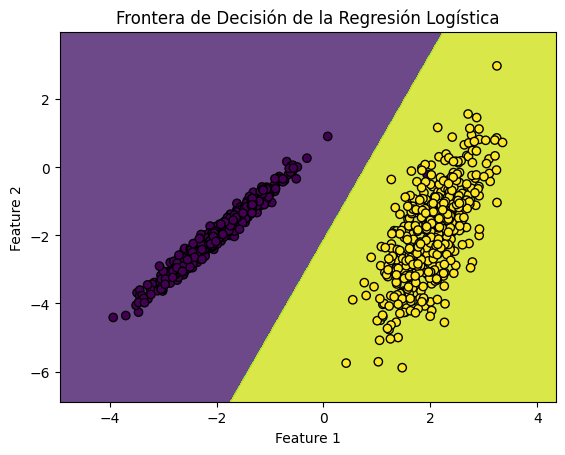

In [81]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predecir las clases para cada punto en la malla
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualizar los datos y la frontera de decisión
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Frontera de Decisión de la Regresión Logística')
plt.show()

## Ejercicio 1:

Explorar regresión logistica con una base de datos real:
La base de datos "Pima Indian Diabetes" es un conjunto de datos muy utilizado en el ámbito del aprendizaje automático para practicar y desarrollar modelos de clasificación, específicamente para predecir la presencia de diabetes en pacientes con base en ciertas medidas diagnósticas.

In [82]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Cargar dataset Pima Indians Diabetes
data = fetch_openml(name="diabetes", version=1, as_frame=True)

# Convertir a DataFrame
df = data.frame
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df.columns = column_names

print(df.head())
print(df.info())
print(df["Outcome"].value_counts())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age          Outcome  
0                     0.627   50  tested_positive  
1                     0.351   31  tested_negative  
2                     0.672   32  tested_positive  
3                     0.167   21  tested_negative  
4                     2.288   33  tested_positive  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-

In [83]:
# Usando map
df["Outcome"] = df["Outcome"].map({
    "tested_negative": 0,
    "tested_positive": 1
})

print(df["Outcome"].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [84]:
# Estadísticas descriptivas
print(df.describe())

# Comprobar valores nulos
print(df.isnull().sum())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000        


###  2: Preparar los Datos

1. **Dividir los datos en características (X) y etiquetas (y)**.



In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir en características (X) y etiquetas (y)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2. **Normalizar los datos**: Utiliza `StandardScaler` para normalizar las características.

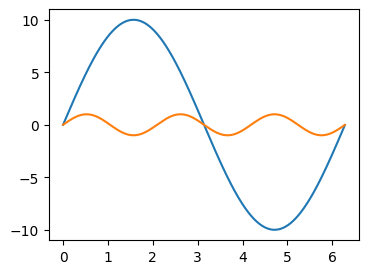

In [145]:
x = np.arange(0,2*np.pi,0.01)
y1= 10*np.sin(x)
y2 = 1*np.sin(3*x)
plt.figure(figsize=(4,3))
plt.plot(x,y1)
plt.plot(x,y2)

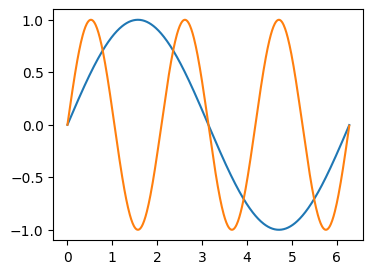

In [146]:
y1 = y1/y1.max()
y2 = y2/y2.max()
plt.figure(figsize=(4,3))
plt.plot(x,y1)
plt.plot(x,y2)

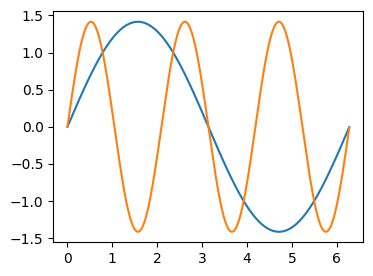

In [147]:
y1 = (y1-y1.mean())/y1.std()
y2 = (y2-y2.mean())/y2.std()
plt.figure(figsize=(4,3))
plt.plot(x,y1)
plt.plot(x,y2)

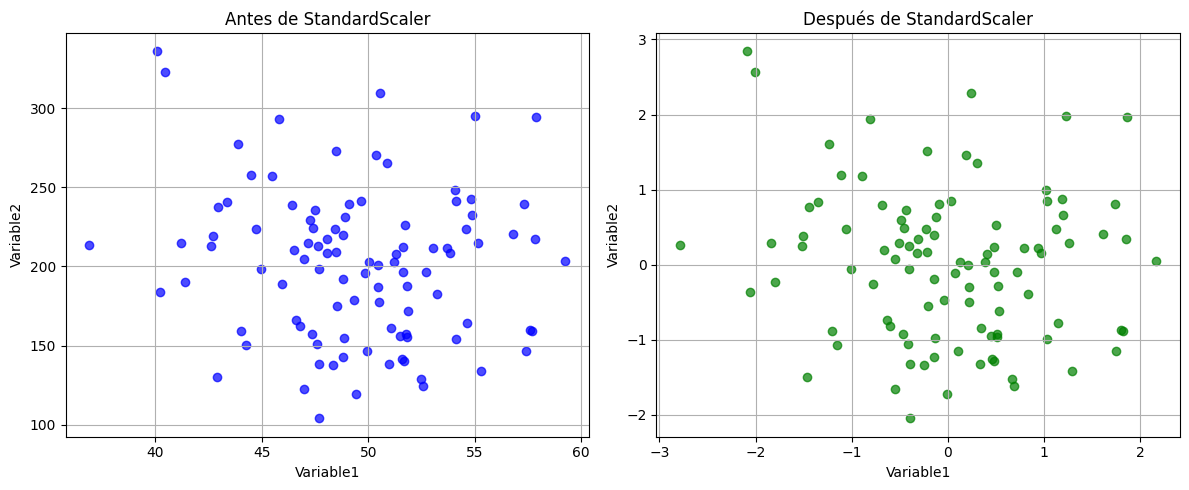

In [148]:
# Crear datos simulados
np.random.seed(42)
var1 = np.random.normal(loc=50, scale=5, size=100)   # media 50, sd 5
var2 = np.random.normal(loc=200, scale=50, size=100) # media 200, sd 50

# Crear DataFrame
df = pd.DataFrame({
    "x1": var1,
    "x2": var2
})

scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df),
    columns=["x1", "x2"]
)

#Graficar antes y después
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Antes
axes[0].scatter(df["x1"], df["x2"], color="blue", alpha=0.7)
axes[0].set_title("Antes de StandardScaler")
axes[0].set_xlabel("Variable1")
axes[0].set_ylabel("Variable2")
axes[0].grid(True)

# Después
axes[1].scatter(df_scaled["x1"], df_scaled["x2"], color="green", alpha=0.7)
axes[1].set_title("Después de StandardScaler")
axes[1].set_xlabel("Variable1")
axes[1].set_ylabel("Variable2")
axes[1].grid(True)

plt.tight_layout()
plt.show()


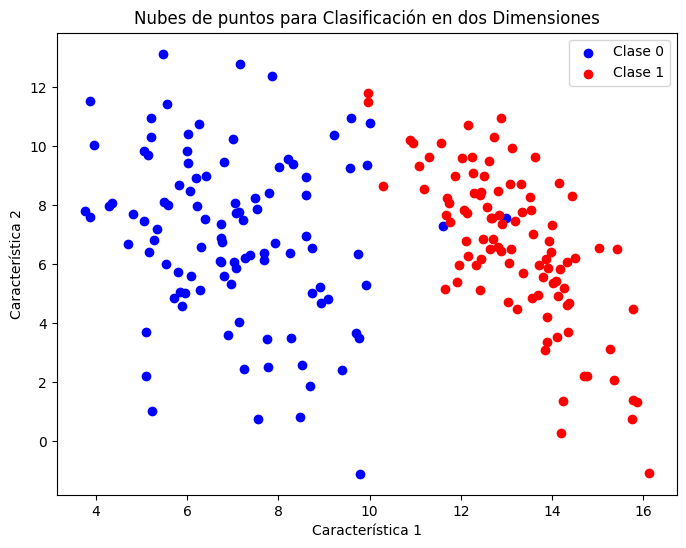

In [149]:

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generar datos de clasificación
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2, random_state=5)
X = 3*X +10
# Visualizar los datos
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Clase 1')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Nubes de puntos para Clasificación en dos Dimensiones')
plt.legend()
plt.show()

In [150]:
# Normalizar las características
scaler = StandardScaler()
x_trans = scaler.fit_transform(X)

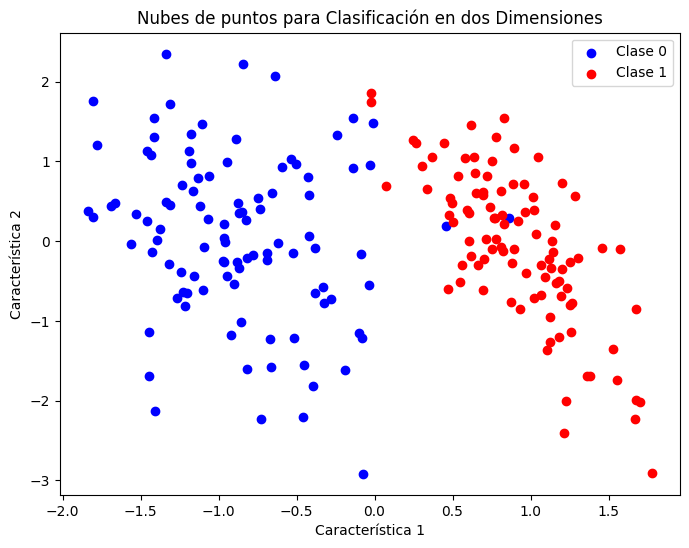

In [151]:
# Visualizar los datos
plt.figure(figsize=(8, 6))
plt.scatter(x_trans[y == 0][:, 0], x_trans[y == 0][:, 1], color='blue', label='Clase 0')
plt.scatter(x_trans[y == 1][:, 0], x_trans[y == 1][:, 1], color='red', label='Clase 1')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Nubes de puntos para Clasificación en dos Dimensiones')
plt.legend()
plt.show()

### 3: Entrenar el Modelo de Regresión Logística

1. **Entrenar el modelo**: Utiliza `LogisticRegression` para entrenar el modelo en el conjunto de entrenamiento.
2. **Evaluar el modelo**: Evalúa el modelo en el conjunto de prueba utilizando métricas como precisión, recall, y la matriz de confusión.

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Entrenar el modelo
model = LogisticRegression(max_iter=10000)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

#entrenar
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7532467532467533
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



###  5: Interpretación de Resultados

1. **Coeficientes del modelo**: Analiza los coeficientes del modelo para entender la importancia de cada característica.
2. **Visualización**: Utiliza gráficos para visualizar la relación entre las características más importantes y la probabilidad de diabetes.

In [153]:
import matplotlib.pyplot as plt
import numpy as np

# Coeficientes del modelo
coefficients = model.coef_[0]
features = X.columns

# Visualizar los coeficientes
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients)
plt.xlabel('Coeficiente')
plt.title('Importancia de las características en el modelo de regresión logística')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# Que hacer cuando tenemos variables categoricas?

### Conjunto de Datos en Formato CSV

In [3]:
import pandas as pd

# Crear el DataFrame a partir del archivo CSV
data = pd.read_csv('users.csv')

# Mostrar el DataFrame original
print("DataFrame Original:")
data.head()

DataFrame Original:


,ID,Genero,Estado Civil,Ocupacion,Ingreso_Anual_(USD)
0,1,M,Soltero,Ingeniero,75000
1,2,F,Casado,Médico,120000
2,3,F,Soltero,Abogado,90000
3,4,M,Casado,Ingeniero,80000
4,5,M,Soltero,Maestro,50000


In [4]:
data["Ocupacion"].value_counts()

Ocupacion
Ingeniero    5
Médico       4
Abogado      4
Maestro      4
Enfermera    3
Name: count, dtype: int64

### Transformar las Variables Categóricas

In [5]:
data_dummies = pd.get_dummies(data, columns=['Genero', 'Estado Civil', 'Ocupacion'], drop_first=True)

# Mostrar el DataFrame con variables dummy
print("\nDataFrame con Variables Dummy:")
data_dummies.head()


DataFrame con Variables Dummy:


,ID,Ingreso_Anual_(USD),Genero_M,Estado Civil_Soltero,Ocupacion_Enfermera,Ocupacion_Ingeniero,Ocupacion_Maestro,Ocupacion_Médico
0,1,75000,True,True,False,True,False,False
1,2,120000,False,False,False,False,False,True
2,3,90000,False,True,False,False,False,False
3,4,80000,True,False,False,True,False,False
4,5,50000,True,True,False,False,True,False


## Ejercicio

Los datos están relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente suscribirá un depósito a plazo fijo (variable y).

Los datos se pueden descargar de la siguiente página y tambien se pueden consultar detalles adicionales

**https://archive.ics.uci.edu/dataset/222/bank+marketing**



In [6]:
df = pd.read_csv('bank-full.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Tratar las variables categoricas**

In [8]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features 

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [9]:
df = pd.get_dummies(df, columns=categorical_features, drop_first=True) 

In [10]:
# rename the y_yes column to y
df.rename(columns={'y_yes': 'y'}, inplace=True) 

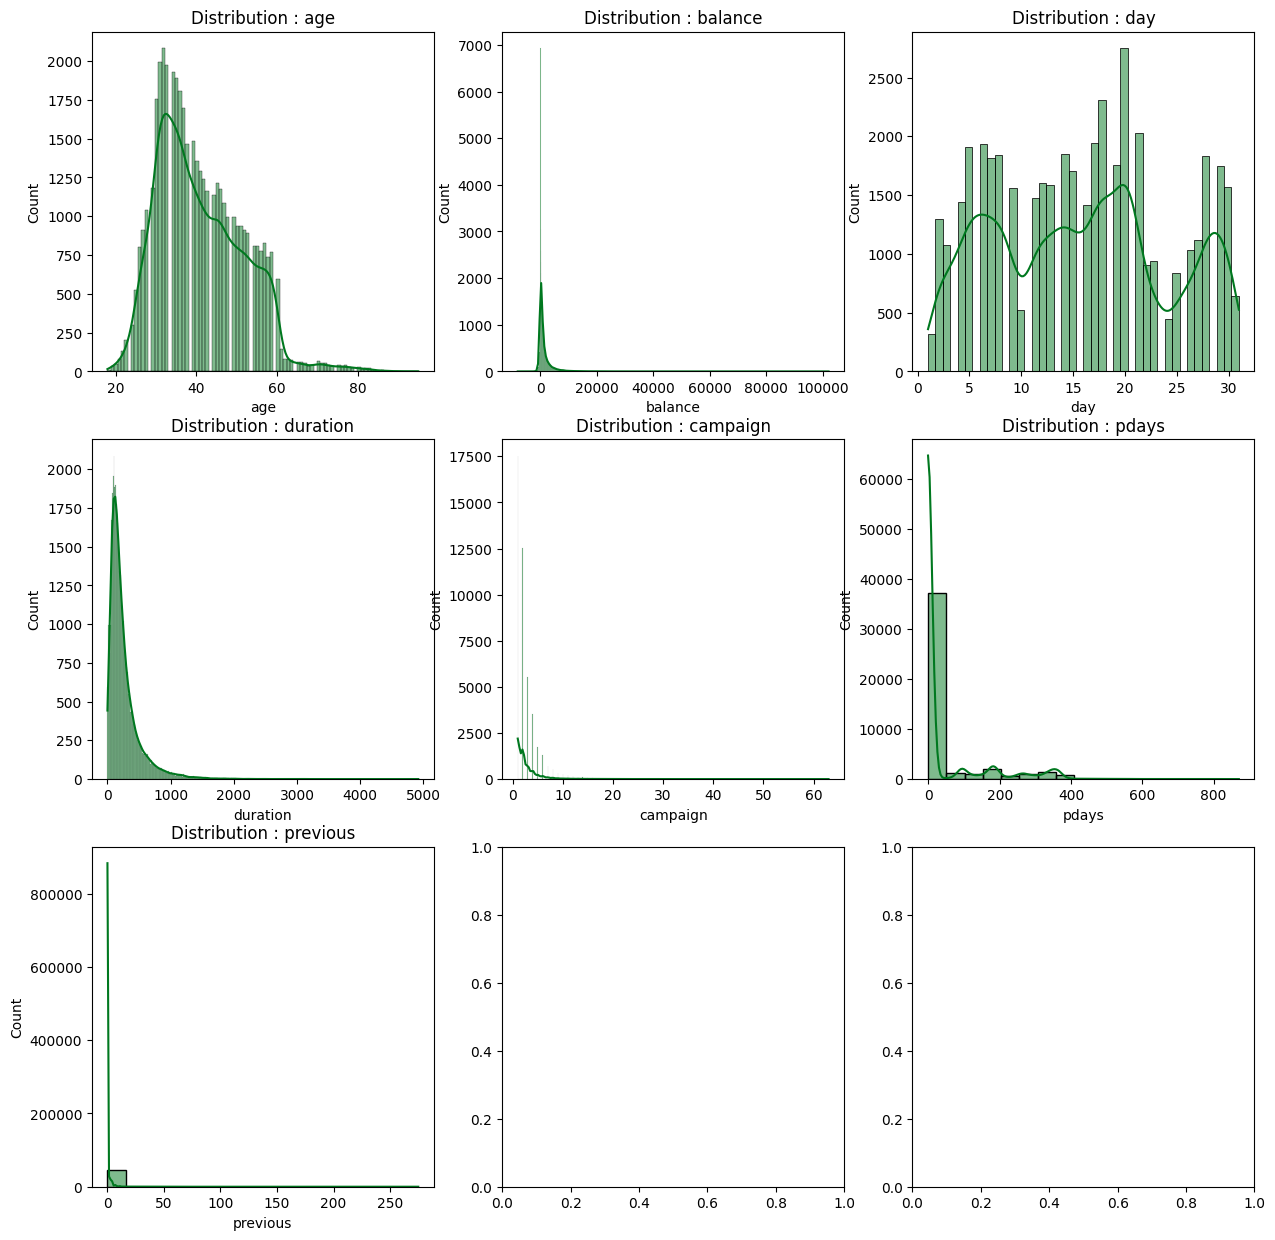

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = df.select_dtypes(include=['int64']).columns
colors = ['#00781F','#2D2926']

fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.histplot(df[numerical_features[i]],color = colors[0],kde=True)
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

In [12]:
X = df.drop('y', axis=1)
y = df['y']

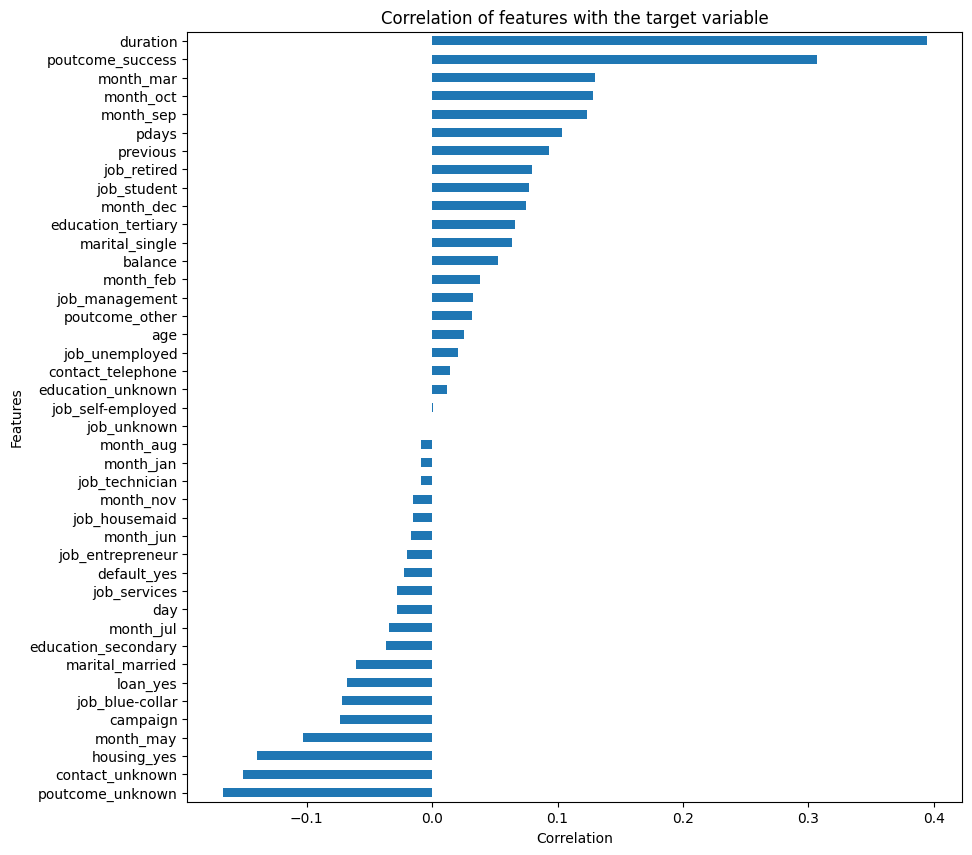

In [13]:
corr = df.corr()
corr_y = corr['y'].sort_values(ascending=True)
corr_y = corr_y.drop('y')
plt.figure(figsize=(10, 10))
corr_y.plot(kind='barh')
plt.title('Correlation of features with the target variable')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

# Ejercicio:
1. Seleccionar aquellas variables que tienen mayor correlación con la variable objetivo y armar un nuevo dataframe
2. Definir un dataset que contenga los datos X, y
3. Separar en conjuntos de entrenamiento y prueba usando una  proporcion 70% 30%
4. Entrenar un modelo de regresión logistica
5. Hacer las predicciones con el conjunto de prueba y calcular metricas
6. Repetir el proceso incluyendo o excluyendo algunas variables

In [59]:
# Calcular la correlación de todas las variables con la variable objetivo 'y'
correlations = df.corr()['y'].drop('y').abs()

# Seleccionar las N variables con mayor correlación (por ejemplo, las 5 más correlacionadas)
top_features = correlations.sort_values(ascending=False).head(5).index.tolist()

# Crear un nuevo dataframe solo con esas variables y la variable objetivo
df_top = df[top_features + ['y']]

print("Variables seleccionadas:", top_features)
df_top.head()

Variables seleccionadas: ['poutcome_success', 'poutcome_unknown', 'contact_unknown', 'housing_yes', 'month_mar']


,poutcome_success,poutcome_unknown,contact_unknown,housing_yes,month_mar,y
0,False,True,True,True,False,False
1,False,True,True,True,False,False
2,False,True,True,True,False,False
3,False,True,True,True,False,False
4,False,True,True,False,False,False


In [60]:
# Eliminar la variable 'duration' ya que no se cuenta con ella antes de la llamada a la campaña
if 'duration' in df.columns:
    df = df.drop('duration', axis=1)



# Definir X y y
X = df.drop('y', axis=1)
y = df['y']

print(X.shape)
print(y.shape)
print(df_top)

(45211, 41)
(45211,)
       poutcome_success  poutcome_unknown  contact_unknown  housing_yes  \
0                 False              True             True         True   
1                 False              True             True         True   
2                 False              True             True         True   
3                 False              True             True         True   
4                 False              True             True        False   
...                 ...               ...              ...          ...   
45206             False              True            False        False   
45207             False              True            False        False   
45208              True             False            False        False   
45209             False              True            False        False   
45210             False             False            False        False   

       month_mar      y  
0          False  False  
1          False  False  


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31647, 41)
(13564, 41)
(31647,)
(13564,)


In [63]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8920672368033029
Confusion Matrix:
[[11808   158]
 [ 1306   292]]
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.99      0.94     11966
        True       0.65      0.18      0.29      1598

    accuracy                           0.89     13564
   macro avg       0.77      0.58      0.61     13564
weighted avg       0.87      0.89      0.86     13564



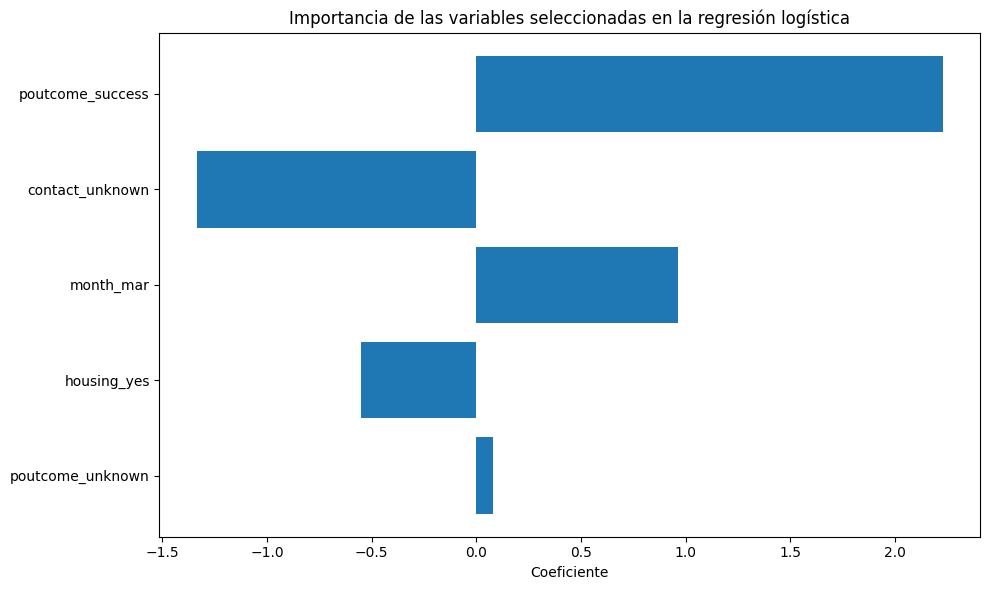

In [67]:
import matplotlib.pyplot as plt

# Supón que tus variables seleccionadas están en la lista top_features
selected_features = top_features  # Cambia esto si tu lista tiene otro nombre

# Obtén los coeficientes solo de esas variables
selected_coefficients = model.coef_[0][[X.columns.get_loc(f) for f in selected_features]]

# Ordenar de mayor a menor por el valor absoluto del coeficiente
sorted_idx = np.argsort(np.abs(selected_coefficients))[::1]
sorted_features = np.array(selected_features)[sorted_idx]
sorted_coefficients = selected_coefficients[sorted_idx]

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_coefficients)
plt.xlabel('Coeficiente')
plt.title('Importancia de las variables seleccionadas en la regresión logística')
plt.tight_layout()
plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

np.random.seed(42)
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Cargar dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 2. Separar en entrenamiento y prueba (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

# 3. Escalar datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Entrenar modelo de regresión logística con solver='liblinear'
log_model = LogisticRegression(solver='liblinear', random_state=42)
log_model.fit(X_train, y_train)

# 5. Imprimir intercepto y coeficientes
print("Intercepto:", log_model.intercept_)
print("Coeficientes:", log_model.coef_)



Intercepto: [0.17757634]
Coeficientes: [[-0.48431991 -0.46467509 -0.4503601  -0.55685253 -0.15972054  0.65734006
  -0.54263986 -0.6288608  -0.11581996  0.02977112 -0.88835779  0.36116556
  -0.2111288  -0.95481577 -0.18663722  0.57519908  0.16879018 -0.25735014
   0.31928871  0.34294713 -0.93863448 -1.21290675 -0.73206367 -0.97569074
  -0.7585647   0.02832094 -0.79133303 -0.99061511 -0.86116755 -0.1606306 ]]


In [7]:
from sklearn.metrics import accuracy_score

# Predicciones sobre el conjunto de prueba
y_pred = log_model.predict(X_test)

# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy del modelo:", accuracy)

Accuracy del modelo: 0.9883040935672515


In [8]:
# ====== 1) Imports ======
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

np.random.seed(42)

# ====== 2) Cargar dataset y armar DataFrame ======
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)  # 30 predictoras
y = pd.Series(data.target, name="target")                # 1 variable objetivo

print(">> Pregunta 16")
print("Shape de X (predictores):", X.shape)              # (569, 30)
print("Shape de y (target):", y.shape)                   # (569,)
print("Total columnas si uno X+y en df:", X.shape[1] + 1)  # 31

# ====== 3) Distribución de clases (Pregunta 17) ======
counts = y.value_counts().sort_index()  # index: 0,1
print("\n>> Pregunta 17")
print(f"Clase 0: {counts[0]} registros")
print(f"Clase 1: {counts[1]} registros")

# ====== 4) Comentario sobre balance (Pregunta 18) ======
p0 = counts[0]/len(y)
p1 = counts[1]/len(y)
print("\n>> Pregunta 18")
print(f"Proporciones -> Clase 0: {p0:.3f}, Clase 1: {p1:.3f}")
if 0.4 < p0 < 0.6 and 0.4 < p1 < 0.6:
    print("Conclusión: balanceado.")
else:
    print("Conclusión: levemente desbalanceado (no extremo).")

# ====== 5) Train/test split 70/30 con estratificación ======
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)
print("\n>> Split (usar para Pregunta de dimensiones)")
print("X_train shape:", X_train.shape)   # esperado (398, 30)
print("X_test  shape:", X_test.shape)    # esperado (171, 30)

# ====== 6) Normalización con StandardScaler (Pregunta 20) ======
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
print("\n>> Pregunta 20")
print("Se aplicó StandardScaler (media 0, varianza 1) a train y test.")

# ====== 7) Entrenar Regresión Logística (solver='liblinear') (Pregunta 21) ======
log_model = LogisticRegression(solver='liblinear', random_state=42)
log_model.fit(X_train_sc, y_train)

intercepto = float(log_model.intercept_[0])
print("\n>> Pregunta 21")
print("Intercepto del modelo (aprox):", round(intercepto, 8))

# ====== 8) Accuracy en test (Pregunta 22) ======
y_pred = log_model.predict(X_test_sc)
acc = accuracy_score(y_test, y_pred)
print("\n>> Pregunta 22")
print("Accuracy en conjunto de prueba:", round(acc, 4))

# ====== (Opcional) Matriz de confusión para referencia rápida ======
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
print("\nMatriz de confusión [filas=Actual (0,1); cols=Pred (0,1)]:\n", cm)


>> Pregunta 16
Shape de X (predictores): (569, 30)
Shape de y (target): (569,)
Total columnas si uno X+y en df: 31

>> Pregunta 17
Clase 0: 212 registros
Clase 1: 357 registros

>> Pregunta 18
Proporciones -> Clase 0: 0.373, Clase 1: 0.627
Conclusión: levemente desbalanceado (no extremo).

>> Split (usar para Pregunta de dimensiones)
X_train shape: (398, 30)
X_test  shape: (171, 30)

>> Pregunta 20
Se aplicó StandardScaler (media 0, varianza 1) a train y test.

>> Pregunta 21
Intercepto del modelo (aprox): 0.17757634

>> Pregunta 22
Accuracy en conjunto de prueba: 0.9883

Matriz de confusión [filas=Actual (0,1); cols=Pred (0,1)]:
 [[ 63   1]
 [  1 106]]
